# Decision Tree

### Step 1: Import necessary libraries
In this step, we will import the necessary libraries for data manipulation, visualization, and model training.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

### Step 2: Load the dataset
We will load the dataset using pandas and display the first few rows to understand its structure.


In [2]:
df = pd.read_csv("./animals.csv")
df.head()

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Step 3: Analyze the dataset
We will check for basic information like data types, missing values, and descriptive statistics.


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sr         90 non-null     int64
 1    Hair      90 non-null     int64
 2    Feathers  90 non-null     int64
 3    Eggs      90 non-null     int64
 4    Milk      90 non-null     int64
 5    Airborne  90 non-null     int64
 6    Aquatic   90 non-null     int64
 7    Predator  90 non-null     int64
 8    Teeth     90 non-null     int64
 9    Backbone  90 non-null     int64
 10   Breathes  90 non-null     int64
 11   Venemous  90 non-null     int64
 12   Fins      90 non-null     int64
 13   Legs      90 non-null     int64
 14   Tails     90 non-null     int64
 15   Domestic  90 non-null     int64
 16   Catsize   90 non-null     int64
 17  Class      90 non-null     int64
dtypes: int64(18)
memory usage: 12.8 KB


,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,0.422222,0.200000,0.577778,0.411111,0.222222,0.388889,0.577778,0.611111,0.822222,0.777778,0.077778,0.177778,2.855556,0.733333,0.144444,0.433333,2.833333
std,26.124701,0.496681,0.402241,0.496681,0.494792,0.418069,0.490229,0.496681,0.490229,0.384467,0.418069,0.269322,0.384467,2.063928,0.444694,0.353509,0.498312,2.116017
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,45.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,67.750000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


### Step 4: Visualize the dataset
We will visualize the dataset to understand the distribution of the features and the target variable.


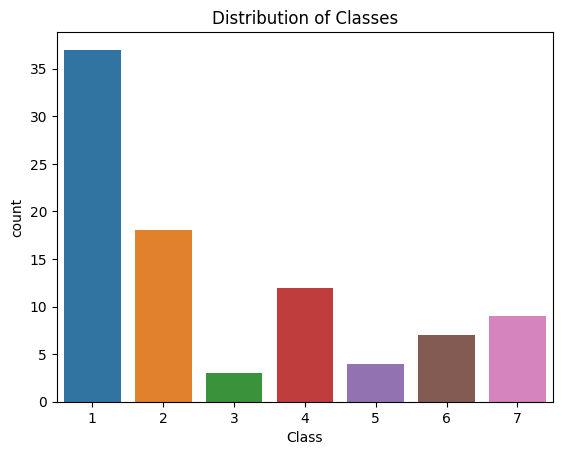

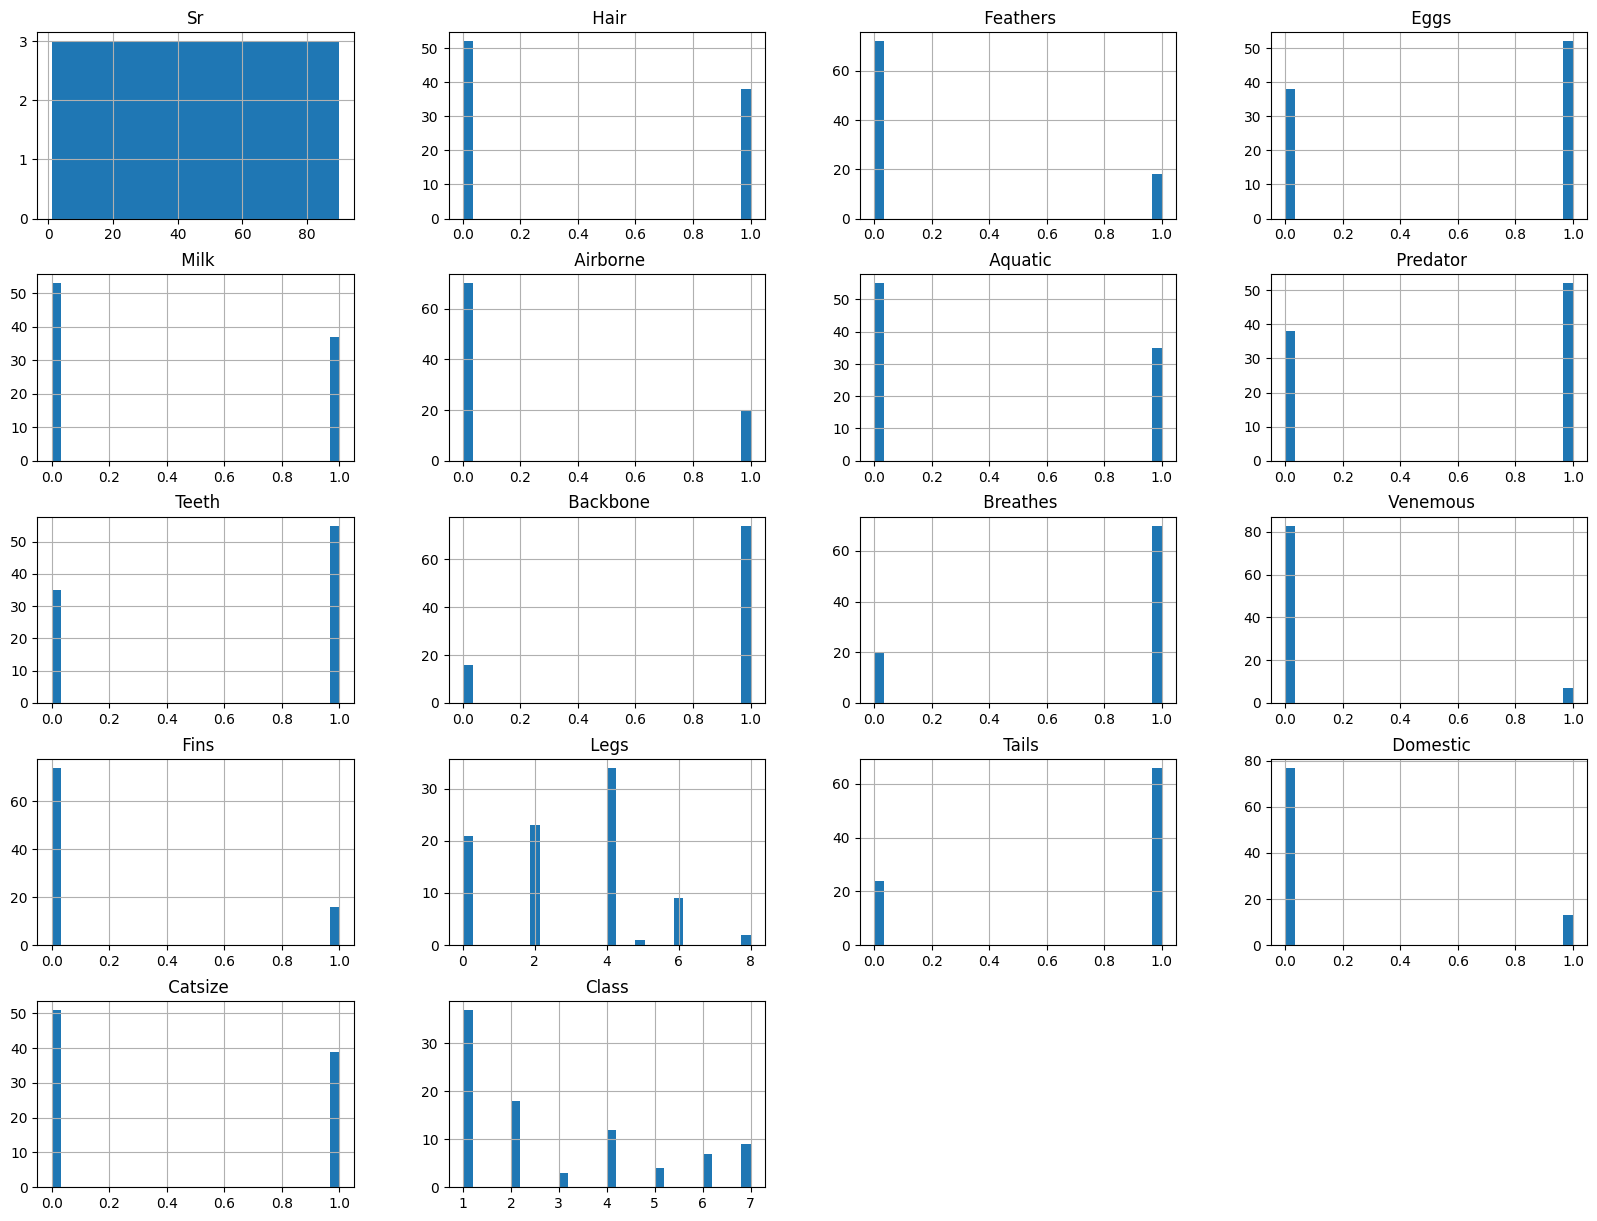

In [4]:
# Visualizing the distribution of the target variable 'Class'
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes')
plt.show()

# Visualizing the distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.show()

### Step 5: Check for correlations
We will check for correlations between features to understand their relationships.


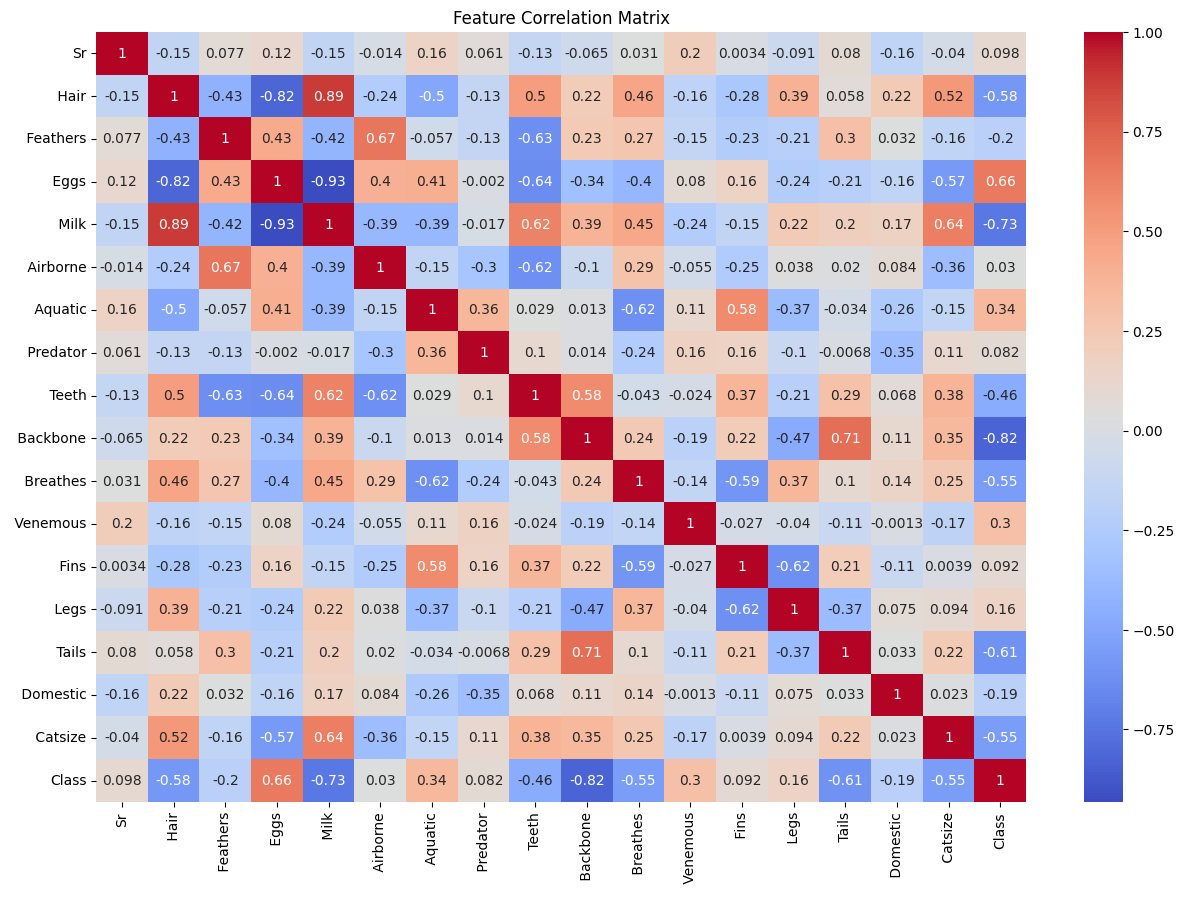

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Step 6: Handle missing values
We will check for missing values and decide on an appropriate strategy to handle them.

In [6]:
df.isnull().sum()


Sr           0
 Hair        0
 Feathers    0
 Eggs        0
 Milk        0
 Airborne    0
 Aquatic     0
 Predator    0
 Teeth       0
 Backbone    0
 Breathes    0
 Venemous    0
 Fins        0
 Legs        0
 Tails       0
 Domestic    0
 Catsize     0
Class        0
dtype: int64

### Step 7: Check for outliers
We will visualize the features to identify any potential outliers.

<Figure size 2000x1500 with 0 Axes>

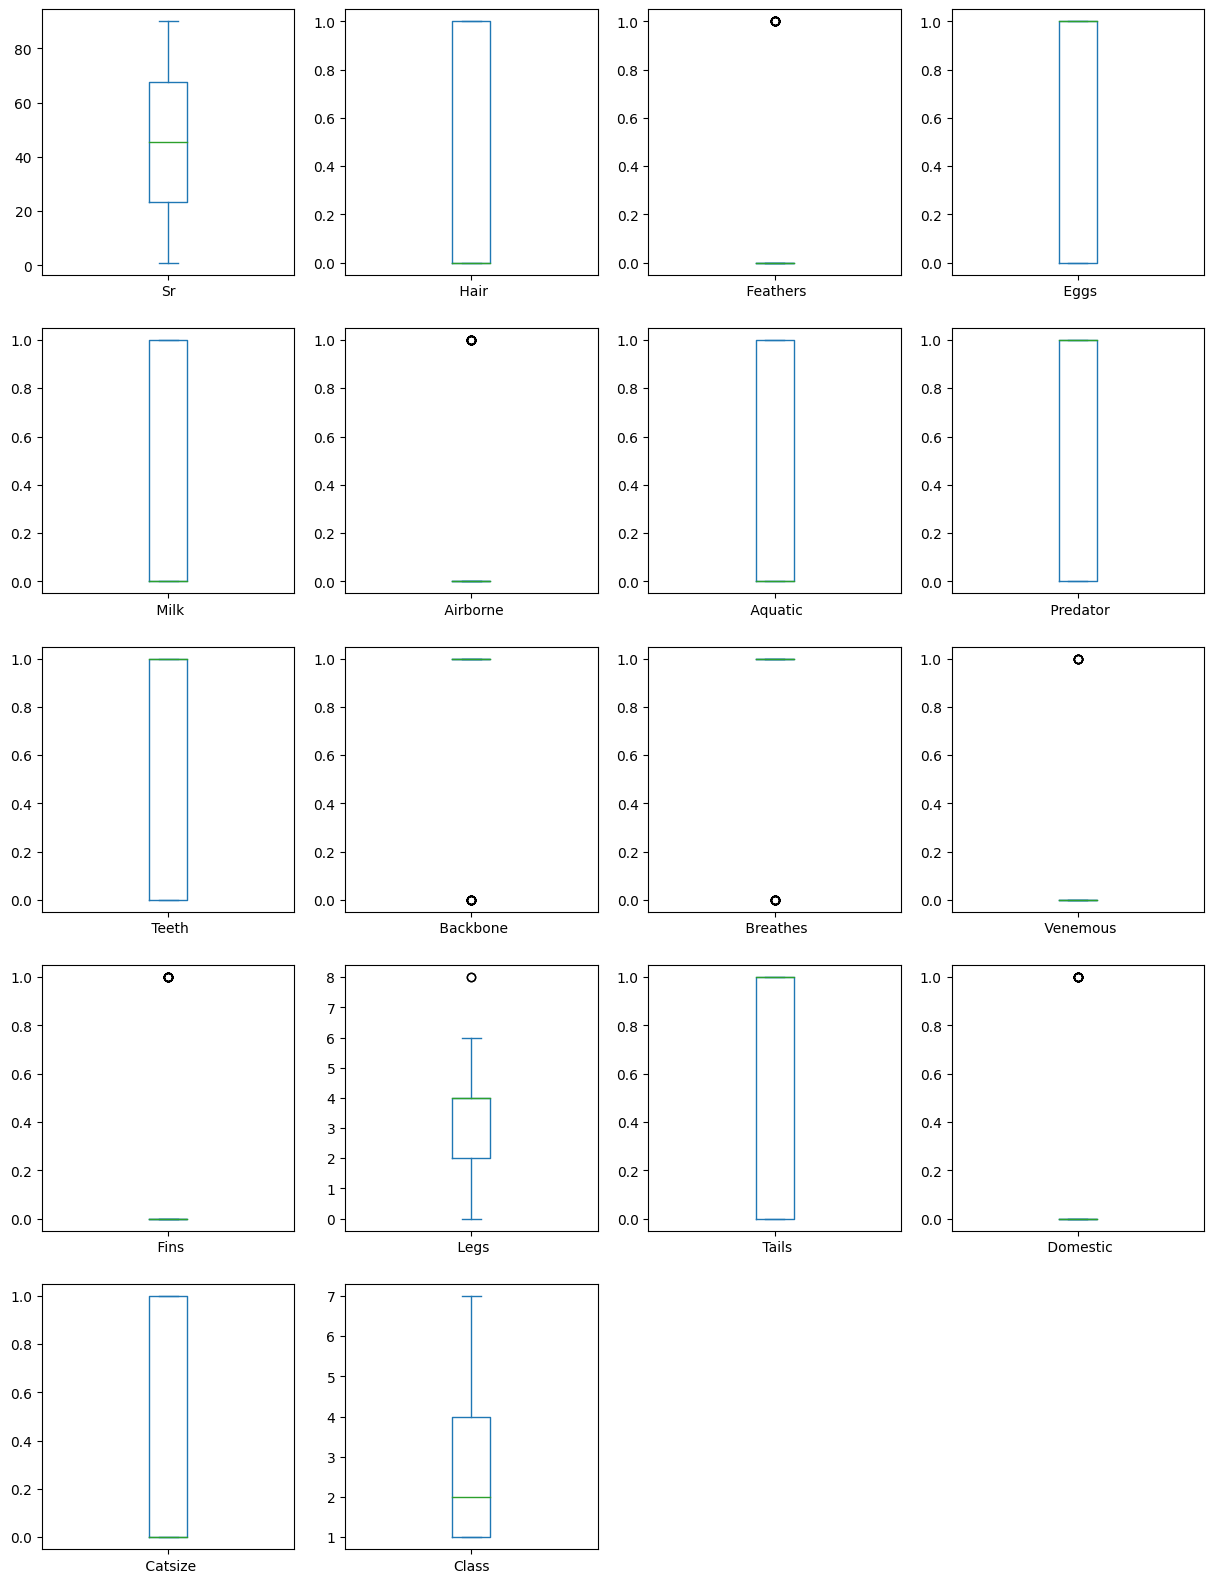

In [7]:
plt.figure(figsize=(20, 15))
df.plot(kind='box', subplots=True, layout=(5, 4), sharex=False, sharey=False, figsize=(15, 20))
plt.show()

### Step 8: Prepare data for training
We will separate the features and the target variable, and then split the data into training and testing sets.

In [8]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 9: Train the Decision Tree model
We will train a Decision Tree classifier on the training data.

In [9]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Step 10: Evaluate the model
We will evaluate the model's performance on the test data using accuracy, confusion matrix, and classification report.


In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9259259259259259
Confusion Matrix:
 [[13  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  1  0  0  0  1]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  1  0]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         3
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       0.00      0.00      0.00         1

    accuracy                           0.93        27
   macro avg       0.82      0.79      0.79        27
weighted avg       0.94      0.93      0.92        27



### Step 11: Learning curve
We will plot the learning curve to understand how the model's performance changes with varying amounts of training data.


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


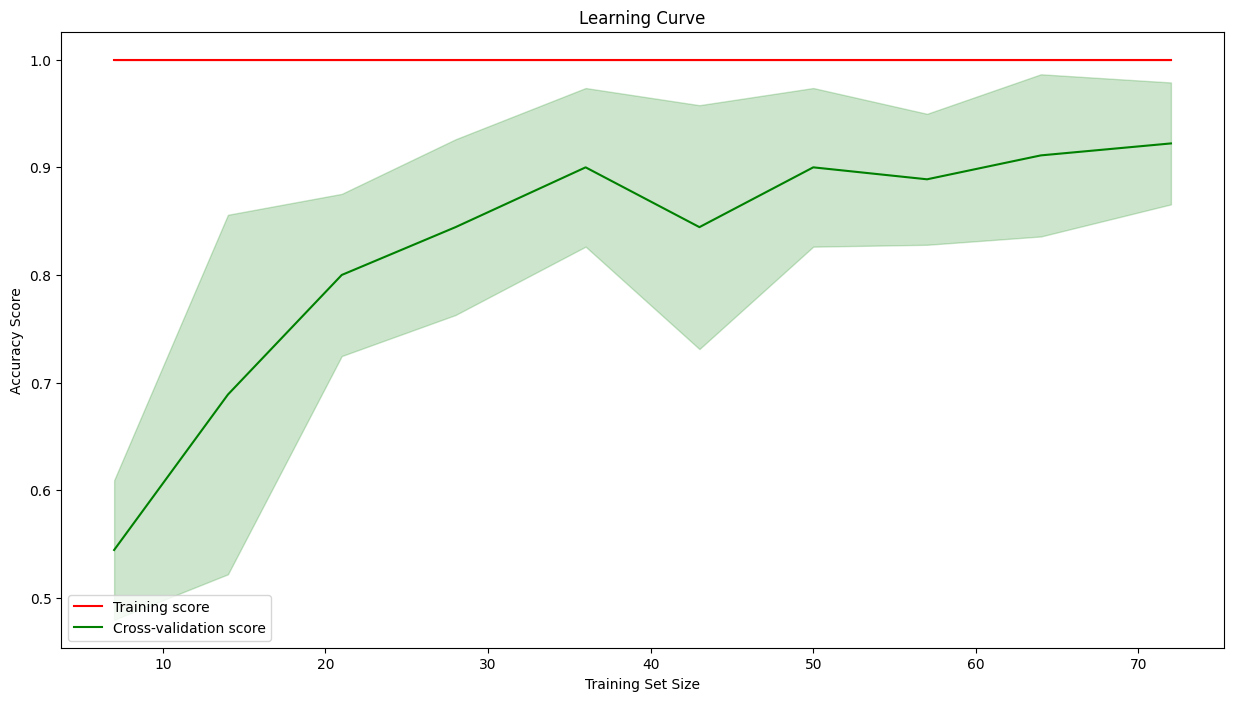

In [11]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15, 8))
plt.plot(train_sizes, train_mean, label="Training score", color="r")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="g")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()